In [1]:
# Mounting G-Drive to this session
# This code snippet is optional if you are using local file system.
# Here we are using google drive as our file system.

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# Import Dependencies

import os
import shutil
import sys
import math
import random
import cv2
import pickle
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.image as simg
import matplotlib.pyplot as plt
import seaborn as sns
import keras.backend as K
from PIL import Image
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from keras.optimizers import SGD, Adam
from sklearn.metrics import classification_report
from keras.layers import Input
from keras import layers
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import ZeroPadding2D
from keras.layers import AveragePooling2D
from keras.layers import GlobalAveragePooling2D
from keras.layers import BatchNormalization
from keras.models import Model, Sequential
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
from keras.engine.topology import get_source_inputs
from keras.regularizers import l2
from keras.layers.core import Dropout
from keras.utils.vis_utils import plot_model
from keras.models import load_model

Using TensorFlow backend.


In [0]:
# Define all the data paths

DRIVE_DIR = '/content/drive/My Drive'
PARENT_DIR_NAME = 'Traffic_Sign_Recognition'

PPM_TRAIN_IMAGE_DIR = os.path.join(DRIVE_DIR, PARENT_DIR_NAME, 'pmp_images_train')
JPG_TRAIN_IMAGE_DIR = os.path.join(DRIVE_DIR, PARENT_DIR_NAME, 'jpg_images_train')# jpg_images_train_for_test
JPG_TEST_IMAGE_DIR = os.path.join(DRIVE_DIR, PARENT_DIR_NAME, 'jpg_images_test')
JPG_VAL_IMAGE_DIR = os.path.join(DRIVE_DIR, PARENT_DIR_NAME, 'jpg_images_val')

BASIC_MODEL_FILE = os.path.join(DRIVE_DIR, PARENT_DIR_NAME, 'basic_cnn.h5')
BASIC_MODEL_HISTORY = os.path.join(DRIVE_DIR, PARENT_DIR_NAME, 'basic_cnn_history.pkl')
BASIC_MODEL_IMAGE = os.path.join(DRIVE_DIR, PARENT_DIR_NAME, 'basic_cnn_image.png')
BASIC_MODEL_PREDICTION = os.path.join(DRIVE_DIR, PARENT_DIR_NAME, 'basic_cnn_prediction.pkl')

IMG_HEIGHT = 32
IMG_WIDTH = 32

In [4]:
model = load_model(BASIC_MODEL_FILE)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




In [0]:
class_text = {0: 'Speed limit (20km/h)', 1: 'Speed limit (30km/h)', 2: 'No passing for vechiles over 3.5 metric tons', 3: 'Right-of-way at the next intersection', 4: 'Priority road', 5: 'Yield', 6: 'Stop', 7: 'No vechiles', 8: 'Vechiles over 3.5 metric tons prohibited', 9: 'No entry', 10: 'General caution', 11: 'Dangerous curve to the left', 12: 'Speed limit (50km/h)', 13: 'Dangerous curve to the right', 14: 'Double curve', 15: 'Bumpy road', 16: 'Slippery road', 17: 'Road narrows on the right', 18: 'Road work', 19: 'Traffic signals', 20: 'Pedestrians', 21: 'Children crossing', 22: 'Bicycles crossing', 23: 'Speed limit (60km/h)', 24: 'Beware of ice/snow', 25: 'Wild animals crossing', 26: 'End of all speed and passing limits', 27: 'Turn right ahead', 28: 'Turn left ahead', 29: 'Ahead only', 30: 'Go straight or right', 31: 'Go straight or left', 32: 'Keep right', 33: 'Keep left', 34: 'Speed limit (70km/h)', 35: 'Roundabout mandatory', 36: 'End of no passing', 37: 'End of no passing by vechiles over 3.5 metric tons', 38: 'Speed limit (80km/h)', 39: 'End of speed limit (80km/h)', 40: 'Speed limit (100km/h)', 41: 'Speed limit (120km/h)', 42: 'No passing'}

Text(0.5, 1.0, 'End of no passing by vechiles over 3.5 metric tons')

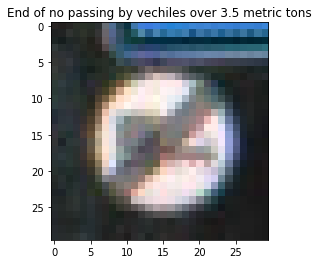

In [8]:
img_file = '/content/drive/My Drive/Traffic_Sign_Recognition/to_display_output/capt.jpg'
img_raw = cv2.imread(img_file)
img = cv2.cvtColor(img_raw,cv2.COLOR_BGR2RGB)
img=cv2.resize(img, (32,32))
img = img/255.0
a=np.reshape(img, (1, 32, 32, 3))

prediction = model.predict(a)

pred_arr = np.argmax(prediction, axis=1)
pred_idx = pred_arr[0]

pred_txt = class_text[pred_idx]

plt.imshow(img_raw)
plt.title(pred_txt)